## Modules

In [68]:
import pandas as pd
import seaborn as sns
%pylab inline
import os

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Dataset description

* __age__: the age of an individual
* __workclass__: a general term to represent the employment status of an individual. 
    * _Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
Without­pay, Never­worked_.
* __fnlwgt__: final weight. In other words, this is the number of people the census believes
the entry represents.
* __education__: the highest level of education achieved by an individual.
    * _Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool_
* __education-­num__: the highest level of education achieved in numerical form.
* __marital-­status__: marital status of an individual. Married ­civ ­spouse corresponds to a
civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.
    * _Married­civ­spouse, Divorced, Never­married, Separated, Widowed,
Married­spouse­absent, Married­AF­spouse_.
* __occupation__: the general type of occupation of an individual
    * _Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,
Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical,
Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv,
Armed­Forces_.
* __relationship__: represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship attribute and is
somewhat redundant with marital status. We might not make use of this attribute at all
    * _Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried_.
* __race__: Descriptions of an individual’s race
    * _White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black_.
* __gender__: the biological sex of the individual
    * _Male, Female_
* __capital­-gain__: capital gains for an individual
* __capital-­loss__: capital loss for an individual
* __hours-­per-­week__: the hours an individual has reported to work per week
* __native-­country__: country of origin for an individual
    * _United­States, Cambodia, England, Puerto­Rico, Canada, Germany,
Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran,
Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador,
Trinadad&Tobago, Peru, Hong, Holand­Netherlands_.
* __income>50__: whether or not an individual makes more than 50,000 annually.


#### Iporting Training set

In [69]:
os.chdir('..\data')
df_train = pd.read_csv('train.csv')

The firs and simplest informatio we can get from the dataset is the schema. To this end we can use the inf() method

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


### Duplicates values

In [71]:
df_train.duplicated().sum()

45

In [72]:
df_train.drop_duplicates(inplace= True)

### Null values analysis

In [79]:
print('% of null values')
round((df_train.isnull().sum()/len(df_train))*100, 2)

% of null values


age               0.00
workclass         5.68
fnlwgt            0.00
education         0.00
marital-status    0.00
occupation        5.70
relationship      0.00
race              0.00
gender            0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
native-country    1.74
income_>50K       0.00
dtype: float64

Since all the missing values are in categorical features we can skip the filling of miaasing values and do it afther we have a more precise picture of categorical variables

We can note that the two features __educational-num__ and __education__ are similar. We can ask ourselvs if there is any relation between them 

<AxesSubplot: xlabel='educational-num', ylabel='education'>

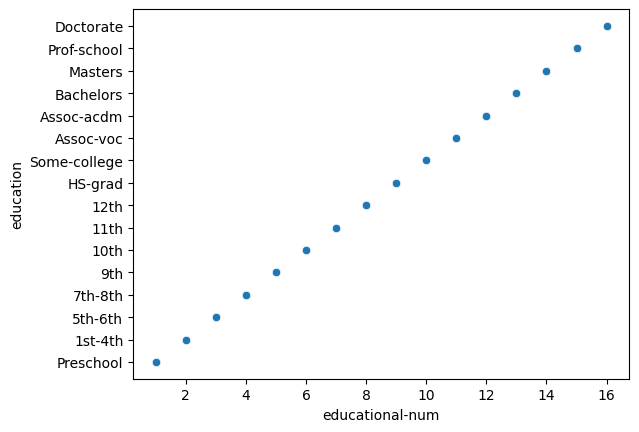

In [74]:
sns.scatterplot(df_train[['education', 'educational-num']].sort_values(by = 'educational-num', ascending = False), x = 'educational-num', y = 'education')

This code shows that this two variables are the same but having different types of values. So that we can drop one of them. We choose the col __educational-num__

In [75]:
df_train.drop(columns= ['educational-num'], inplace = True)

## Numerical variables distributions

We can select numerical variables by filtering the features having an numerical datatype, which in this case is int64. For histplot and basic statistical quantities, this is nont necessary

In [76]:
df_train.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income_>50K
count,43912.000000,4.391200e+04,43912.000000,43912.000000,43912.000000,43912.000000
mean,38.625979,1.896731e+05,1094.680452,88.336924,40.411049,0.239411
std,13.732018,1.058338e+05,7574.333230,404.785801,12.401140,0.426729
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.780600e+05,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376255e+05,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000,1.000000


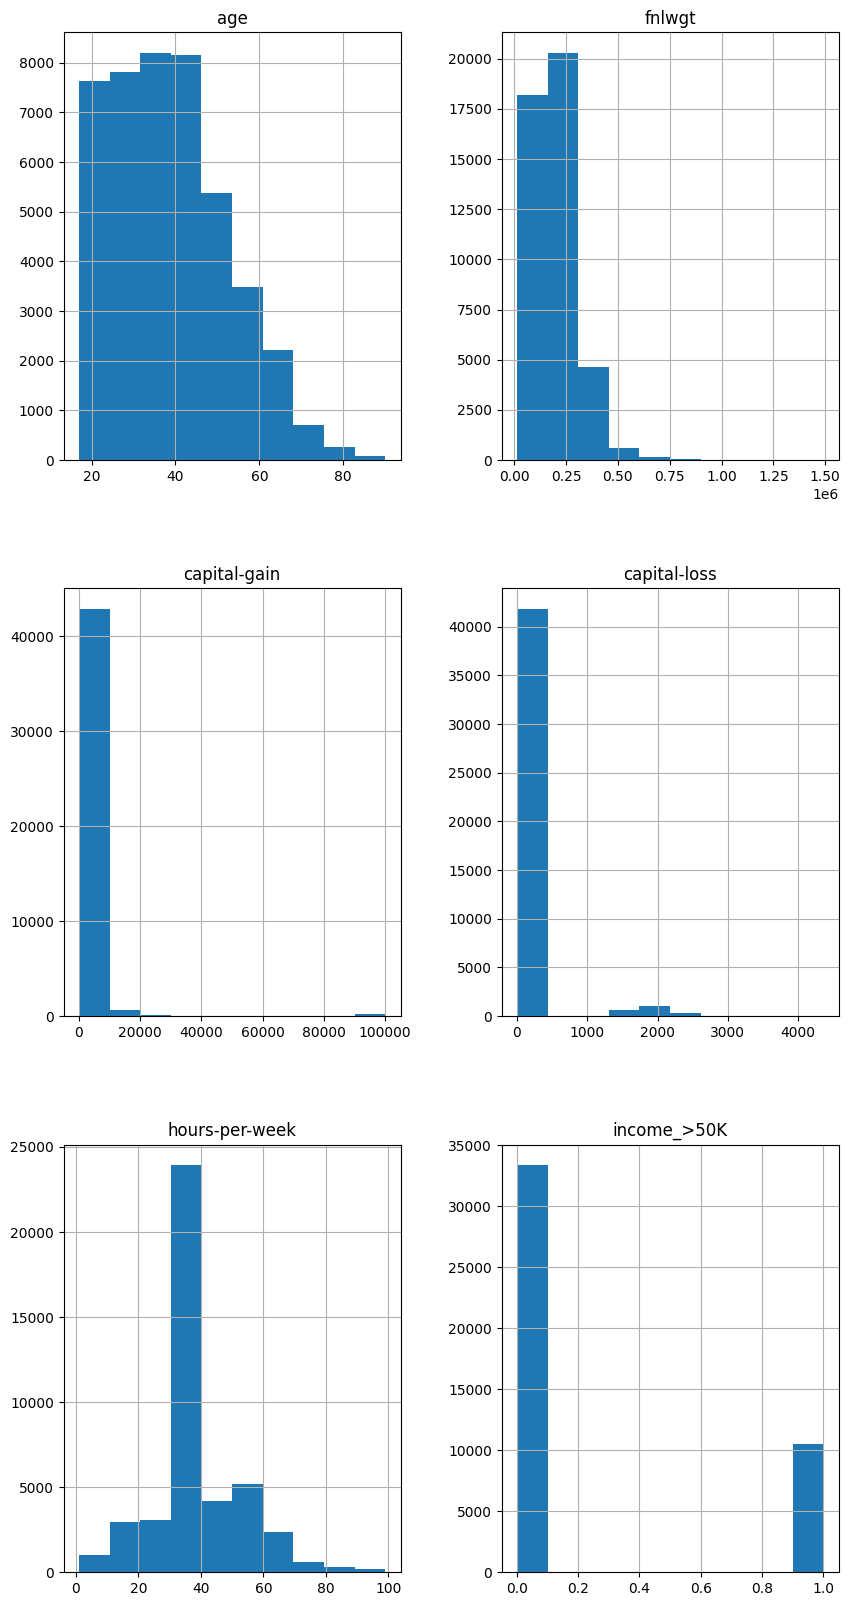

In [77]:
df_train.hist(figsize= (10, 20))
plt.show()

<AxesSubplot: >

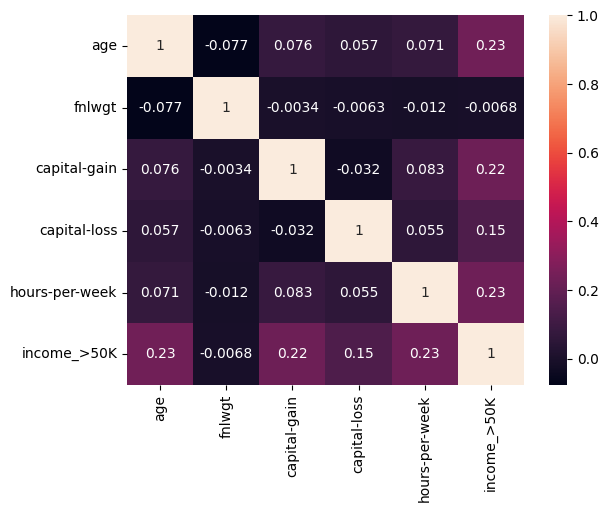

In [78]:
sns.heatmap(df_train.select_dtypes('int64').corr(), annot = True)

### Categorical vriables

In [86]:
df_train.select_dtypes('object').columns.tolist()

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

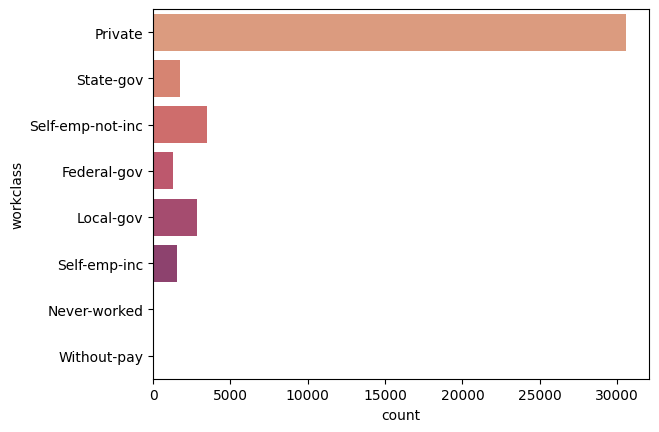

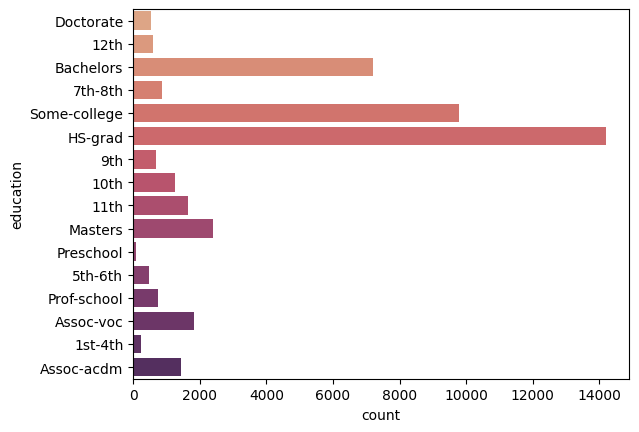

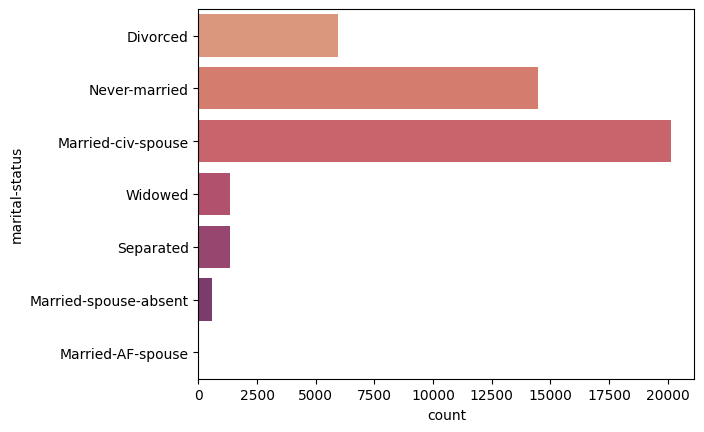

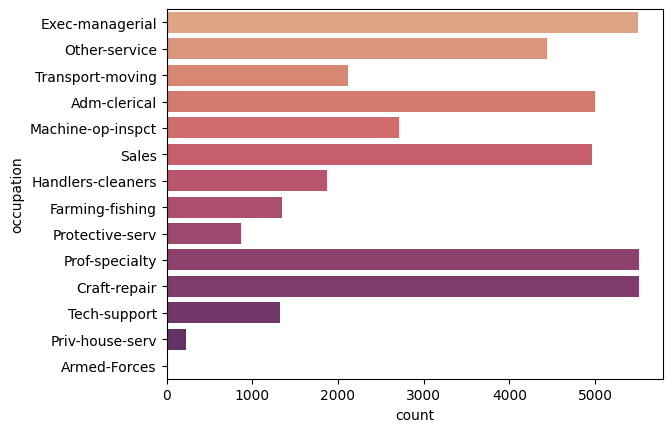

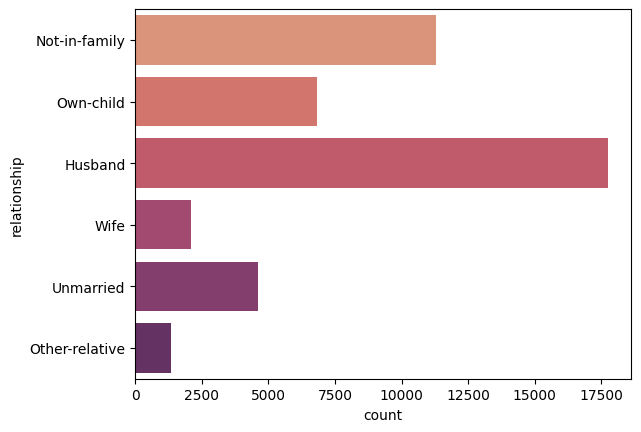

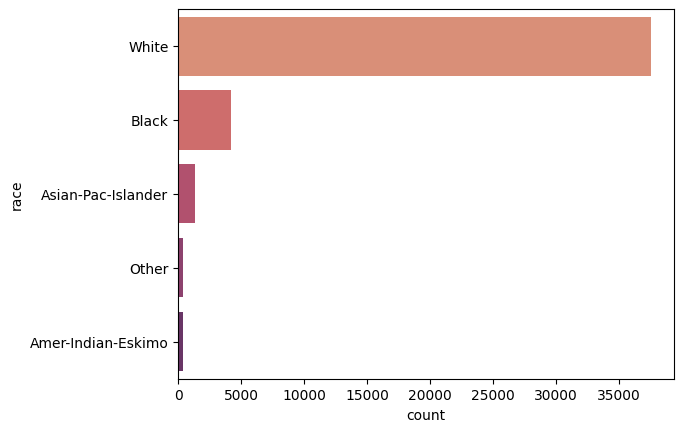

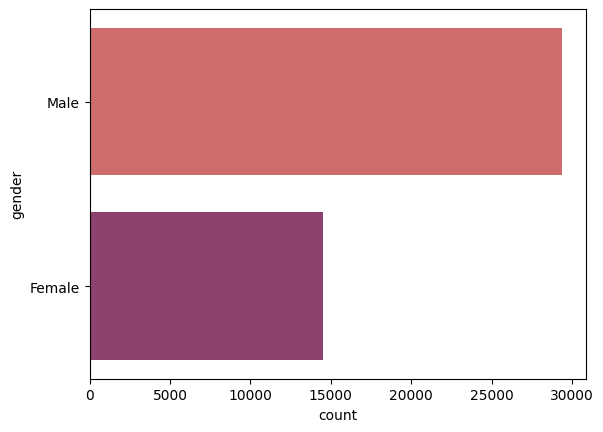

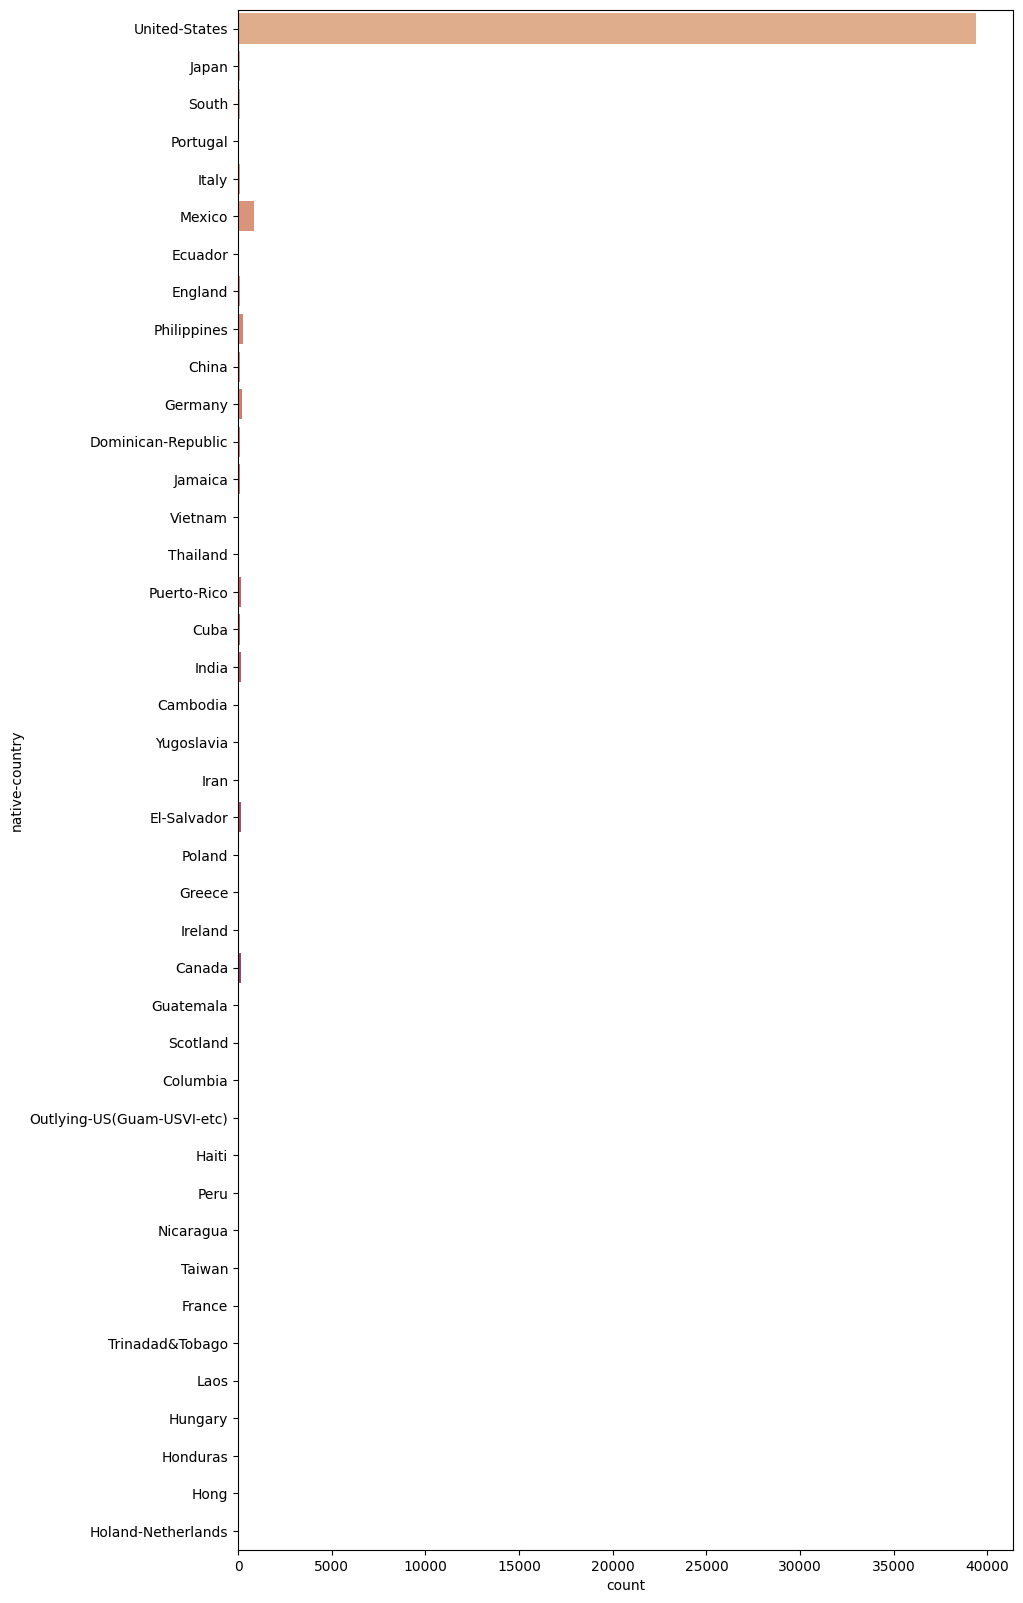

In [109]:
cols = df_train.select_dtypes('object').columns.tolist()
for i in range(len(cols)):
    if cols[i] == 'native-country':
        plt.figure(figsize = (10, 20))
    sns.countplot(df_train.select_dtypes('object'), y = cols[i], palette = 'flare')
    plt.show()